In [3]:
# Clean data

import pandas

dataset = pandas.read_csv('../nips-papers/papers_modified.csv', delimiter=',')
dataset['word_count'] = dataset['abstract'].apply(lambda x: len(str(x).split(' ')))
dataset.head()

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

stop_words = set(stopwords.words('english'))

new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
stop_words = stop_words.union(new_words)

corpus = []

n = len(dataset['abstract'])
for i in range(0, n):
    text = re.sub('[^a-zA-Z]', ' ', dataset['abstract'][i])
    text = text.lower()
    text = re.sub('&lt;/?.*>&gt;', ' &lt;&gt; ', text)
    text = re.sub('(\\d|\\W)+', ' ', text)
    text = text.split()
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in stop_words]
    text = ' '.join(text)
    corpus.append(text)

In [4]:
# Text preparation
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_df=0.8, stop_words=stop_words, max_features=10000, ngram_range=(1,3))
# list(cv.vocabulary_.keys())[:10]

[Text(0, 0, 'model'),
 Text(0, 0, 'algorithm'),
 Text(0, 0, 'learning'),
 Text(0, 0, 'method'),
 Text(0, 0, 'problem'),
 Text(0, 0, 'data'),
 Text(0, 0, 'network'),
 Text(0, 0, 'approach'),
 Text(0, 0, 'function'),
 Text(0, 0, 'based'),
 Text(0, 0, 'time'),
 Text(0, 0, 'paper'),
 Text(0, 0, 'task'),
 Text(0, 0, 'result'),
 Text(0, 0, 'distribution'),
 Text(0, 0, 'feature'),
 Text(0, 0, 'propose'),
 Text(0, 0, 'image'),
 Text(0, 0, 'state'),
 Text(0, 0, 'inference')]

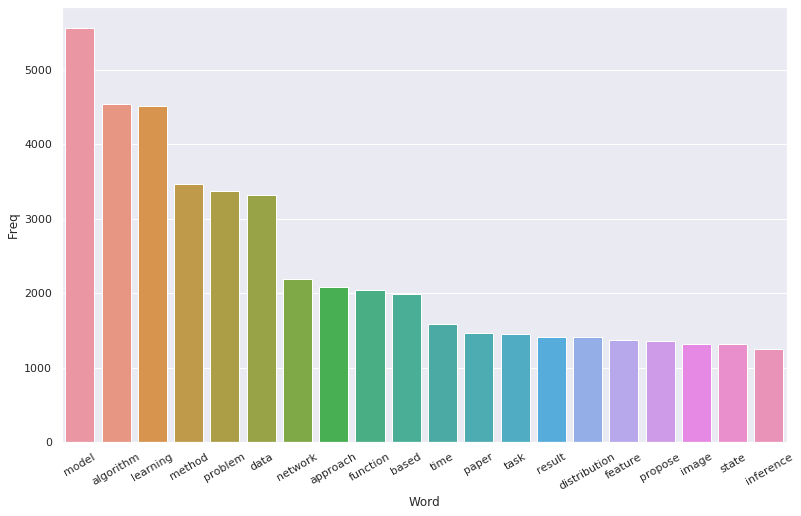

In [7]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

top_words = get_top_n_words(corpus, n=20)
top_df = pandas.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)